In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
np.random.seed(42)
num_samples = 550

cgpa = np.clip(np.random.normal(7.0, 1.0, num_samples), 5.0, 10.0)
score = np.clip(np.random.normal(500, 100, num_samples), 200, 800)

placed = []
for i in range(num_samples):
    # Nonlinear decision boundary: circle in the CGPA-Score space
    if (cgpa[i] - 7.0)**2 + ((score[i] - 500)/100)**2 < 2.5:
        placed.append(1)
    else:
        placed.append(0)

dataset = pd.DataFrame({
    'CGPA': cgpa,
    'Score': score,
    'Placed': placed
})

print(dataset['Placed'].value_counts())
dataset.head()

Placed
1    401
0    149
Name: count, dtype: int64


,CGPA,Score,Placed
0,7.496714,508.658979,1
1,6.861736,484.432276,1
2,7.647689,616.778206,1
3,8.523030,525.442084,1
4,6.765847,533.760266,1


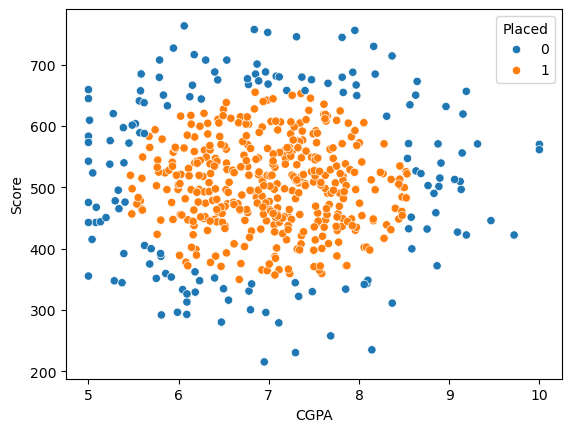

In [3]:
# check the graph for linearity
sns.scatterplot(x='CGPA', y='Score', data= dataset, hue='Placed')
plt.show()

In [4]:
# input output

x = dataset.iloc[:, :-1]
y = dataset['Placed']

In [5]:
# train test and split

from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# model selection

from sklearn.svm import SVR

In [8]:
svmR = SVR(kernel='poly', degree=9)

In [9]:
svmR.fit(x_train, y_train)

SVR(degree=9, kernel='poly')

In [11]:
# check the accuracy

svmR.score(x_test, y_test)

0.09816933454648691

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


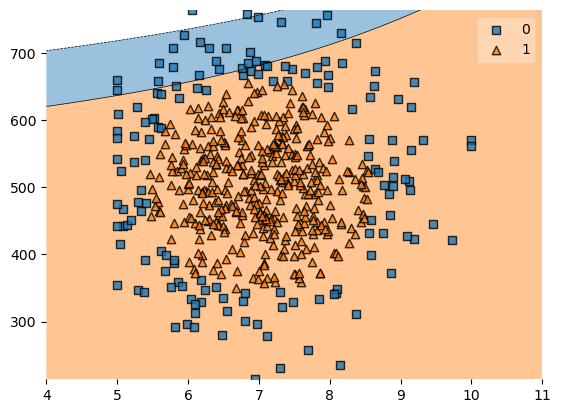

In [12]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=svmR)
plt.show()